In [2]:
#bibliotecas a serem utilizadas 
#visualização de RMSE no jupyter
library(ggplot2)
library(tidyverse)


Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [3]:
kalman=as.data.frame(read.table("../ESC/150-2100/resultados/df_kalmanSmoothing.txt"))
inter=as.data.frame(read.table("../ESC/150-2100/resultados/df_linear_interpolation.txt"))
locf=as.data.frame(read.table("../ESC/150-2100/resultados/df_locf.txt"))
mean=as.data.frame(read.table("../ESC/150-2100/resultados/df_mean.txt"))
median=as.data.frame(read.table("../ESC/150-2100/resultados/df_median.txt"))
malExp=as.data.frame(read.table("../ESC/150-2100/resultados/df_movingAverage_exponential.txt"))
malLin=as.data.frame(read.table("../ESC/150-2100/resultados/df_movingAverage_linear.txt"))
malSim=as.data.frame(read.table("../ESC/150-2100/resultados/df_movingAverage_simple.txt"))
spl=as.data.frame(read.table("../ESC/150-2100/resultados/df_spline_interpolation.txt"))
sti=as.data.frame(read.table("../ESC/150-2100/resultados/df_stine_interpolation.txt"))


In [4]:
names(kalman)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(inter)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(locf)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(mean)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(median)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(malExp)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(malLin)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(malSim)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(spl)=c("algoritmo" , "rmse", "mse", "mae", "mape")
names(sti)=c("algoritmo" , "rmse", "mse", "mae", "mape")


tamanhoGap= seq(150,2100,50) 

mediaKal=c()
mediaInter=c()
mediaLocf=c()
mediaMean=c()
mediaMedian=c()
mediaMalExp=c()
mediaMalLin=c()
mediaMalSim=c()
mediaSpl=c()
mediaSti=c()

sdKal=c()
sdInter=c()
sdLocf=c()
sdMean=c()
sdMedian=c()
sdMalExp=c()
sdMalLin=c()
sdMalSim=c()
sdSpl=c()
sdSti=c()

varKal=c()
varInter=c()
varLocf=c()
varMean=c()
varMedian=c()
varMalExp=c()
varMalLin=c()
varMalSim=c()
varSpl=c()
varSti=c()


sdLacKal=c()
sdLacInter=c()
sdLacLocf=c()
sdLacMean=c()
sdLacMedian=c()
sdLacMalExp=c()
sdLacMalLin=c()
sdLacMalSim=c()
sdLacSpl=c()
sdLacSti=c()


varLacKal=c()
varLacInter=c()
varLacLocf=c()
varLacMean=c()
varLacMedian=c()
varLacMalExp=c()
varLacMalLin=c()
varLacMalSim=c()
varLacSpl=c()
varLacSti=c()


mediaLacKal=c()
mediaLacInter=c()
mediaLacLocf=c()
mediaLacMean=c()
mediaLacMedian=c()
mediaLacMalExp=c()
mediaLacMalLin=c()
mediaLacMalSim=c()
mediaLacSpl=c()
mediaLacSti=c()

func <- function(i){
    ob=c(i,i+40,i+80)
    
    return(ob)
}

a=c()
# Calculando a média das três lacunas do dia 
for(z in seq(1,40,1)){
    for (i in seq(z,3600,120)){
        a=(func(i))
        
        mediaLacInter=append(mediaLacInter, mean(inter$rmse[a]))
        mediaLacKal=append(mediaLacKal, mean(kalman$rmse[a])) 
        mediaLacLocf=append(mediaLacLocf,mean(locf$rmse[a]))
        mediaLacMean=append(mediaLacMean,mean(mean$rmse[a]))
        mediaLacMedian=append(mediaLacMedian,mean(median$rmse[a]))
        mediaLacMalExp=append(mediaLacMalExp,mean(malExp$rmse[a]))
        mediaLacMalLin=append(mediaLacMalLin,mean(malLin$rmse[a]))
        mediaLacMalSim=append(mediaLacMalSim,mean(malSim$rmse[a]))
        mediaLacSpl=append(mediaLacSpl,mean(spl$rmse[a]))
        mediaLacSti=append(mediaLacSti,mean(sti$rmse[a]))


        sdLacKal=append(sdLacKal, sd(kalman$rmse[a])) 
        sdLacInter=append(sdLacInter, sd(inter$rmse[a]))
        sdLacLocf=append(sdLacLocf,sd(locf$rmse[a]))
        sdLacMean=append(sdLacMean,sd(mean$rmse[a]))
        sdLacMedian=append(sdLacMedian,sd(median$rmse[a]))
        sdLacMalExp=append(sdLacMalExp,sd(malExp$rmse[a]))
        sdLacMalLin=append(sdLacMalLin,sd(malLin$rmse[a]))
        sdLacMalSim=append(sdLacMalSim,sd(malSim$rmse[a]))
        sdLacSpl=append(sdLacSpl,sd(spl$rmse[a]))
        sdLacSti=append(sdLacSti,sd(sti$rmse[a]))


        varLacKal=append(varLacKal, var(kalman$rmse[a])) 
        varLacInter=append(varLacInter, var(inter$rmse[a]))
        varLacLocf=append(varLacLocf,var(locf$rmse[a]))
        varLacMean=append(varLacMean,var(mean$rmse[a]))
        varLacMedian=append(varLacMedian,var(median$rmse[a]))
        varLacMalExp=append(varLacMalExp,var(malExp$rmse[a]))
        varLacMalLin=append(varLacMalLin,var(malLin$rmse[a]))
        varLacMalSim=append(varLacMalSim,var(malSim$rmse[a]))
        varLacSpl=append(varLacSpl,var(spl$rmse[a]))
        varLacSti=append(varLacSti,var(sti$rmse[a]))
    }
}

for (i in seq(1,1200,30)) {
    #calculando a média
    mediaInter=append(mediaInter,(mean(mediaLacInter[i:(i+29)])))
    mediaKal=append(mediaKal, (mean(mediaLacKal[i:(i+29)])))
    mediaLocf=append(mediaLocf, (mean(mediaLacLocf[i:(i+29)])))
    mediaMean=append(mediaMean, (mean(mediaLacMean[i:(i+29)])))
    mediaMedian=append(mediaMedian, (mean(mediaLacMedian[i:(i+29)])))
    mediaMalExp=append(mediaMalExp, (mean(mediaLacMalExp[i:(i+29)])))
    mediaMalLin=append(mediaMalLin, (mean(mediaLacMalLin[i:(i+29)])))
    mediaMalSim=append(mediaMalSim, (mean(mediaLacMalSim[i:(i+29)])))
    mediaSpl=append(mediaSpl, (mean(mediaLacSpl[i:(i+29)])))
    mediaSti=append(mediaSti, (mean(mediaLacSti[i:(i+29)])))
    
    #calculando o devio padrão
    sdInter=append(sdInter,(sd(sdLacInter[i:(i+29)])))
    sdKal=append(sdKal, (sd(sdLacKal[i:(i+29)])))
    sdLocf=append(sdLocf, (sd(sdLacLocf[i:(i+29)])))
    sdMean=append(sdMean, (sd(sdLacMean[i:(i+29)])))
    sdMedian=append(sdMedian, (sd(sdLacMedian[i:(i+29)])))
    sdMalExp=append(sdMalExp, (sd(sdLacMalExp[i:(i+29)])))
    sdMalLin=append(sdMalLin, (sd(sdLacMalLin[i:(i+29)])))
    sdMalSim=append(sdMalSim, (sd(sdLacMalSim[i:(i+29)])))
    sdSpl=append(sdSpl, (sd(sdLacSpl[i:(i+29)])))
    sdSti=append(sdSti, (sd(sdLacSti[i:(i+29)])))

    #calculando a variancia
    varInter=append(varInter,(var(varLacInter[i:(i+29)])))
    varKal=append(varKal, (var(varLacKal[i:(i+29)])))
    varLocf=append(varLocf, (var(varLacLocf[i:(i+29)])))
    varMean=append(varMean, (var(varLacMean[i:(i+29)])))
    varMedian=append(varMedian, (var(varLacMedian[i:(i+29)])))
    varMalExp=append(varMalExp, (var(varLacMalExp[i:(i+29)])))
    varMalLin=append(varMalLin, (var(varLacMalLin[i:(i+29)])))
    varMalSim=append(varMalSim, (var(varLacMalSim[i:(i+29)])))
    varSpl=append(varSpl, (var(varLacSpl[i:(i+29)])))
    varSti=append(varSti, (var(varLacSti[i:(i+29)])))

}
mediaInter=as.data.frame(mediaInter)
names(mediaInter)=c("media")
mediaInter$sd=sdInter
mediaInter$var=varInter
mediaInter$tamanho=tamanhoGap
mediaInter$algoritmo="Interpolation"

mediaKal=as.data.frame(mediaKal)
names(mediaKal)=c("media")
mediaKal$sd=sdKal
mediaKal$var=varKal
mediaKal$tamanho=tamanhoGap
mediaKal$algoritmo="Kalman"


mediaLocf=as.data.frame(mediaLocf)
names(mediaLocf)=c("media")
mediaLocf$sd=sdLocf
mediaLocf$var=varLocf
mediaLocf$tamanho=tamanhoGap
mediaLocf$algoritmo="Locf"


mediaMean=as.data.frame(mediaMean)
names(mediaMean)=c("media")
mediaMean$sd=sdMean
mediaMean$var=varMean
mediaMean$tamanho=tamanhoGap
mediaMean$algoritmo="Mean"

mediaMedian=as.data.frame(mediaMedian)
names(mediaMedian)=c("media")
mediaMedian$sd=sdMedian
mediaMedian$var=varMedian
mediaMedian$tamanho=tamanhoGap
mediaMedian$algoritmo="Median"


mediaMalExp=as.data.frame(mediaMalExp)
names(mediaMalExp)=c("media")
mediaMalExp$sd=sdMalExp
mediaMalExp$var=varMalExp
mediaMalExp$tamanho=tamanhoGap
mediaMalExp$algoritmo="Moving Average Exponential"

mediaMalLin=as.data.frame(mediaMalLin)
names(mediaMalLin)=c("media")
mediaMalLin$sd=sdMalLin
mediaMalLin$var=varMalLin
mediaMalLin$tamanho=tamanhoGap
mediaMalLin$algoritmo="Moving Average Linear"

mediaMalSim=as.data.frame(mediaMalSim)
names(mediaMalSim)=c("media")
mediaMalSim$sd=sdMalSim
mediaMalSim$var=varMalSim
mediaMalSim$tamanho=tamanhoGap
mediaMalSim$algoritmo="Moving Average Simple"




mediaSti=as.data.frame(mediaSti)
names(mediaSti)=c("media")
mediaSti$sd=sdSti
mediaSti$var=varSti
mediaSti$tamanho=tamanhoGap
mediaSti$algoritmo="Stine"

mediaSpl=as.data.frame(mediaSpl)
names(mediaSpl)=c("media")
mediaSpl$sd=sdSpl
mediaSpl$var=varSpl
mediaSpl$tamanho=tamanhoGap
mediaSpl$algoritmo="Spline"

todos = rbind(mediaKal, mediaInter, mediaLocf, mediaMedian, mediaMean, mediaMalExp, mediaMalLin, mediaMalSim, mediaSpl, mediaSti)

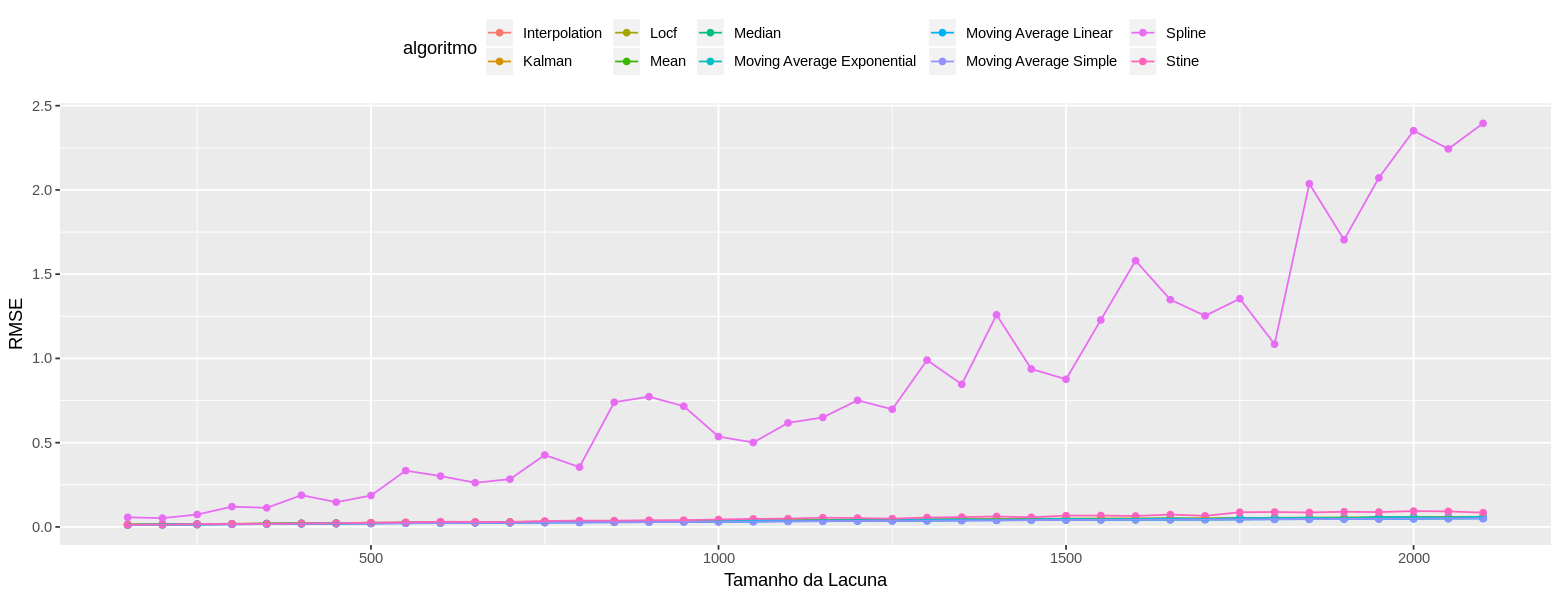

In [15]:
options(repr.plot.width=13, repr.plot.height=5)

ggplot(todos, aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    theme(legend.position = "top", legend.direction = "horizontal") + 
    labs(y="RMSE", x="Tamanho da Lacuna")


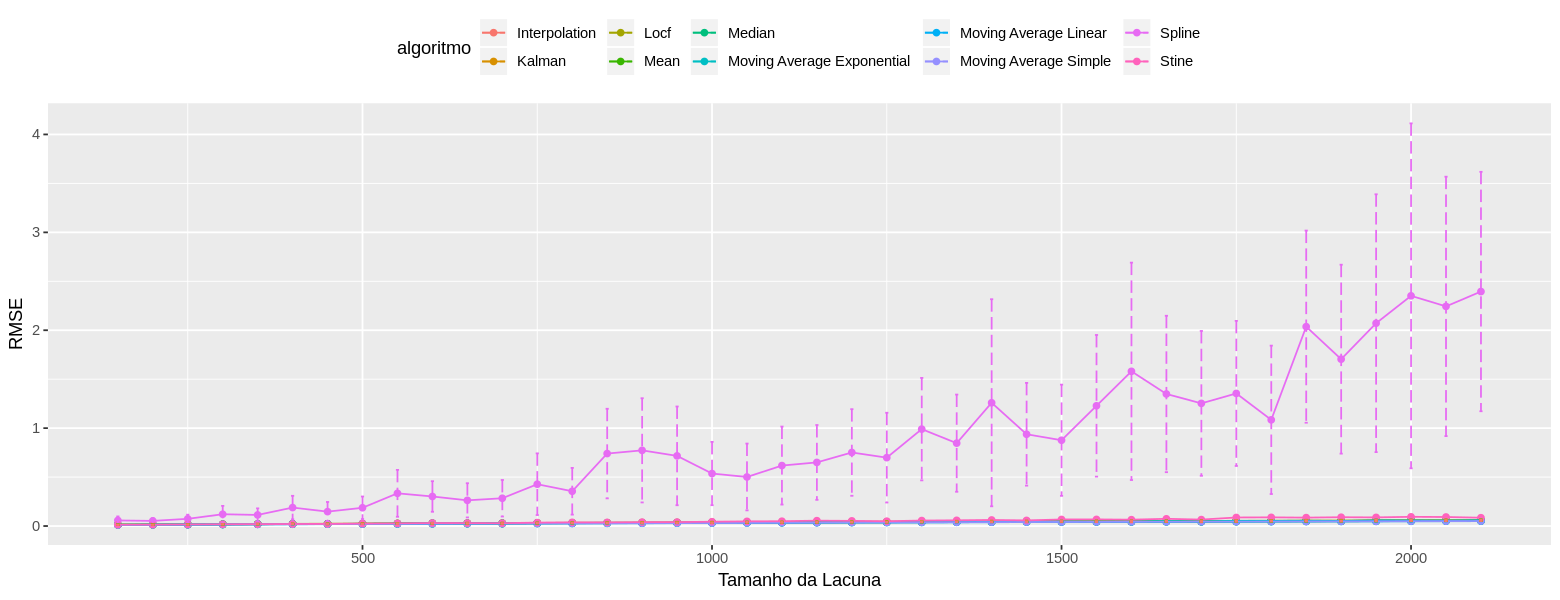

In [16]:
n=90 #tamanho da amostra. Ou seja, tem 90 lacunas de tamanho 1, 2 de tamanho 20... 90 de tamanho 100
error=qnorm(0.975)*todos$sd/sqrt(n)
todos$error=error
# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.1) # move them .05 to the left and right

ggplot(todos, aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error), linetype=11,  position=pd) +
    theme(legend.position = "top", legend.direction = "horizontal") + 

    labs(y="RMSE", x="Tamanho da Lacuna")


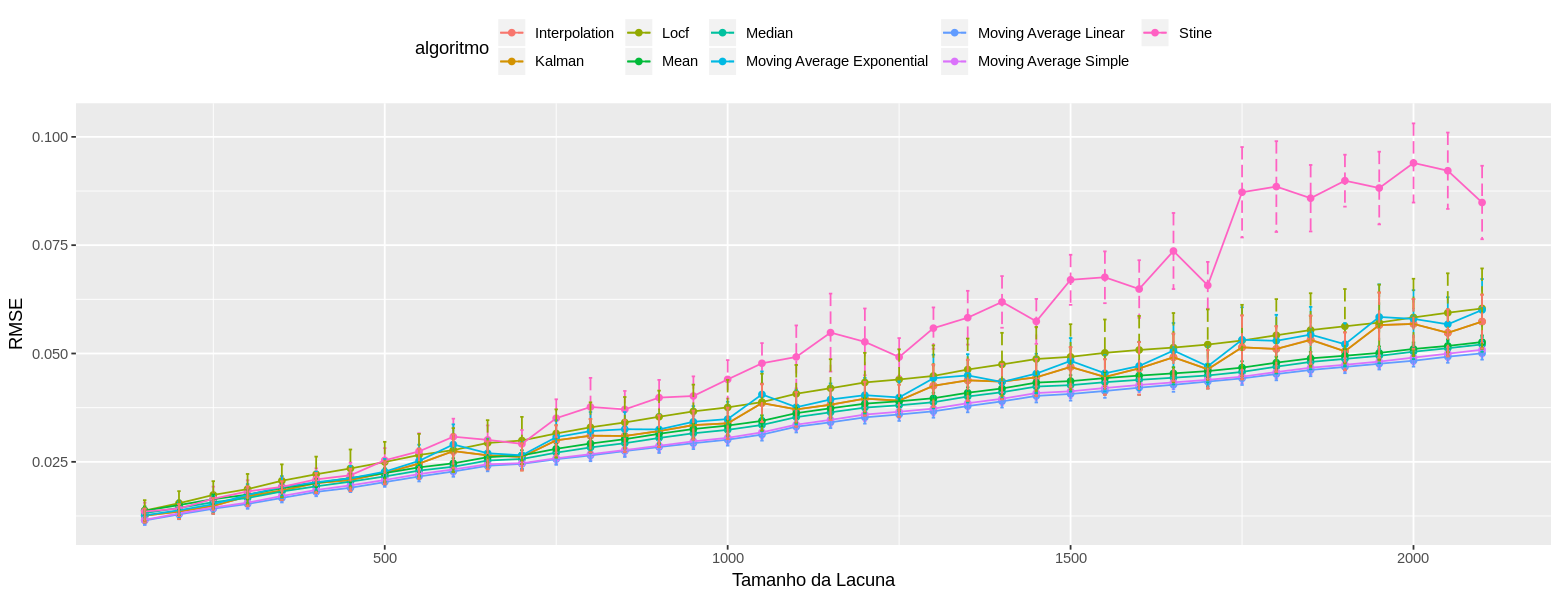

In [17]:
ggplot(todos[which(todos$algoritmo!= "Spline"),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error),linetype=11,  position=pd) +
    theme(legend.position = "top", legend.direction = "horizontal") + 

    labs(y="RMSE", x="Tamanho da Lacuna") 
    


In [5]:
(filter(todos, tamanho==150))

media,sd,var,tamanho,algoritmo
0.01259799,0.007766485,7.373663e-08,150,Kalman
0.01259730,0.007767239,7.373859e-08,150,Interpolation
0.01375477,0.011601113,4.902248e-07,150,Locf
0.01317741,0.004923756,1.592935e-08,150,Median
0.01371030,0.004793984,1.310776e-08,150,Mean
0.01265238,0.007877201,9.227873e-08,150,Moving Average Exponential
0.01147488,0.005112989,1.344674e-08,150,Moving Average Linear
0.01161113,0.005171753,1.303627e-08,150,Moving Average Simple
0.05705848,0.198468366,3.459965e-02,150,Spline
0.01353275,0.009880806,2.058807e-07,150,Stine


In [7]:
teste=(select(todos[order(todos$tamanho, todos$media, decreasing=c(FALSE,FALSE)),], -sd))

by_mean <- group_by(teste, tamanho)
#summarise(by_mean, rmseMin = min(media))

In [8]:
#Agrupando o dataframe pelo tamanho e algoritmo
by_alg=group_by(teste, tamanho, algoritmo)
#sumarizando o agrupamento pela menor média
by_length=summarise(by_alg, media=min(media))
#filtrando o resultado pela menor média. 
a=by_length%>% filter(media==min(media))
a



tamanho,algoritmo,media
150,Moving Average Linear,0.01147488
200,Moving Average Linear,0.01286388
250,Moving Average Linear,0.01418239
300,Moving Average Linear,0.01528164
350,Moving Average Linear,0.01666559
400,Moving Average Linear,0.01805786
450,Moving Average Linear,0.01901249
500,Moving Average Linear,0.02031758
550,Moving Average Linear,0.02161777
600,Moving Average Linear,0.02277266


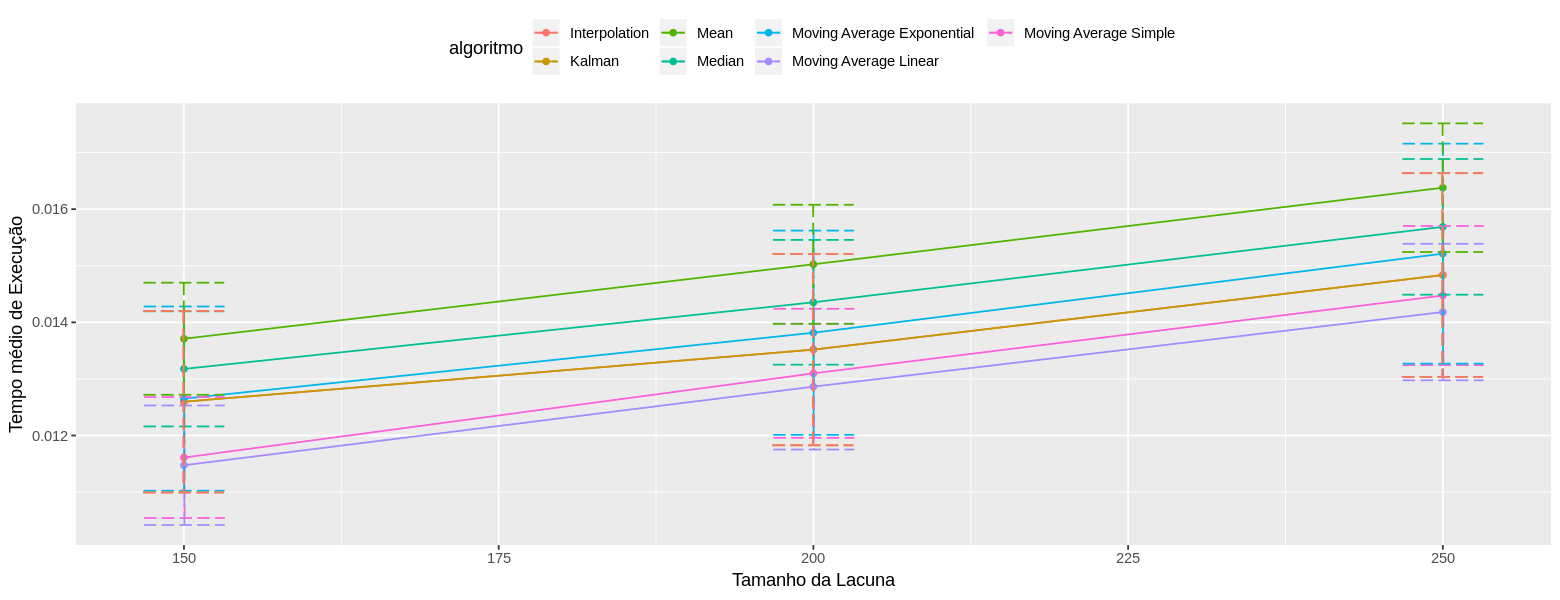

In [18]:
ggplot(todos[which(todos$algoritmo!= "Locf" & todos$algoritmo!= "Spline" & todos$algoritmo!= "Stine" & todos$tamanho<300),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error),linetype=11,  position=pd) +
    theme(legend.position = "top", legend.direction = "horizontal") + 

    labs(y="Tempo médio de Execução", x="Tamanho da Lacuna") 
    
    